In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

In [3]:
! conda install openbabel -c conda-forge -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/charlesseo/.conda/envs/chemprop

  added / updated specs:
    - openbabel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py38h578d9bd_0         150 KB  conda-forge
    openbabel-3.1.1            |   py38hf4b5c11_1         5.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following NEW packages will be INSTALLED:

  openbabel          conda-forge/linux-64::openbabel-3.1.1-py38hf4b5c11_1

The following packages will be UP

In [23]:
import pandas as pd
from rdkit.Chem import PandasTools

covid_convert = pd.read_csv("/home/charlesseo/zinc/zinc_top_100.csv")
PandasTools.AddMoleculeColumnToFrame(covid_convert, "smiles", "molecule")
PandasTools.WriteSDF(covid_input, "/home/charlesseo/zinc/covid.sdf", molColName = "molecule", properties = list(covid_convert.columns))

,smiles,zinc_id,fda,molecule
0,C1CCCCC1,ZINC000001532203,0.288267,
1,C1CCCC1,ZINC000001690078,0.288267,
2,C1CCCCCCCCCCC1,ZINC000054962163,0.288267,
3,C1CCCCCCCCC1,ZINC000071613926,0.288267,
4,C1CCCCCCCCCCCCC1,ZINC000059585752,0.288267,
...,...,...,...,...
95,C1CCC2(CC1)CCN(CCN1CCCC1)CC2,ZINC000089892483,0.267311,
96,C=C1CCCCCCCCCCC1,ZINC000002145730,0.267220,
97,C1CCCN(CCN2CCCC2)CC1,ZINC000041207425,0.267205,
98,C1CCCN2CCCN(CC1)C2,ZINC000019327033,0.267149,

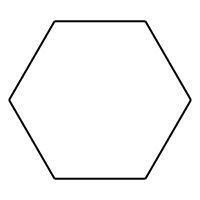
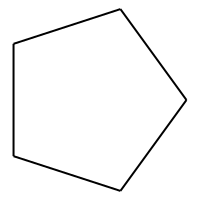
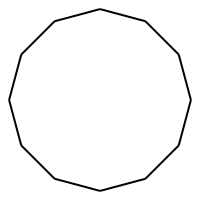
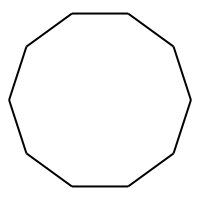
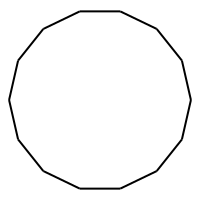
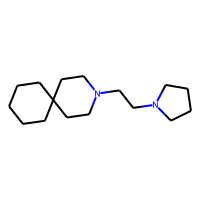
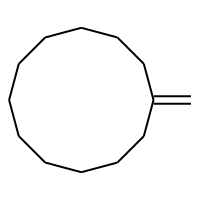
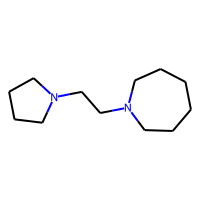
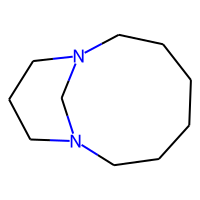
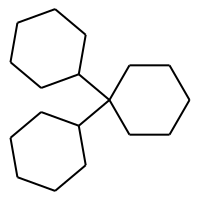

In [24]:
covid_convert

In [25]:
covid_input = Chem.SDMolSupplier("/home/charlesseo/zinc/covid.sdf")
covid = [m for m in covid_input if m]

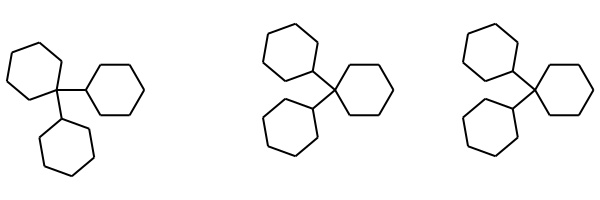

In [30]:
basic_structure = covid[99]
atomic_scaffold = MurckoScaffold.GetScaffoldForMol(basic_structure)
atomic_scaffold.Compute2DCoords()
graph_scaffold = MurckoScaffold.MakeScaffoldGeneric(atomic_scaffold)
Draw.MolsToGridImage([basic_structure, atomic_scaffold, graph_scaffold])

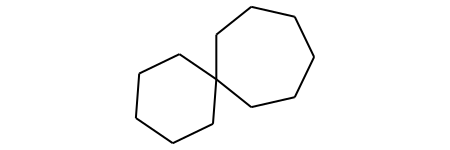

In [38]:
covid[20]

In [40]:
covid_atomic_scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in covid]
for i in covid_atomic_scaffolds:
    i.Compute2DCoords()

In [43]:
def genericize_scaffold(s):
    try:
        return MurckoScaffold.MakeScaffoldGeneric(s)
    except ValueError:
        return None

covid_graph_scaffolds = [genericize_scaffold(s) for s in covid_atomic_scaffolds]

In [46]:
len(covid), len(covid_atomic_scaffolds), len(covid_graph_scaffolds), len([x for x in covid_graph_scaffolds if x == None])

(100, 100, 100, 0)

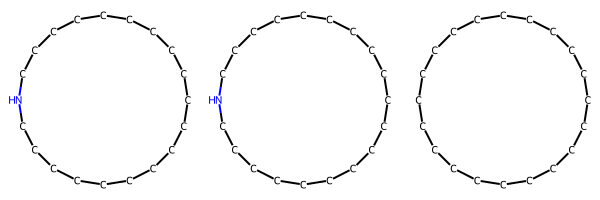

In [48]:
Draw.MolsToGridImage([covid[40], covid_atomic_scaffolds[40], covid_graph_scaffolds[40]])

In [49]:
scaffold_smiles = [Chem.MolToSmiles(scaffold) for scaffold in covid_graph_scaffolds if scaffold != None]

In [50]:
len(scaffold_smiles), scaffold_smiles[0]

(100, 'C1CCCCC1')

In [52]:
import collections

count = collections.Counter(scaffold_smiles)

In [53]:
print(count)

Counter({'C1CCCC(C2CCCCC2)CC1': 3, 'C1CCCC1': 2, 'C1CCCCC(C2CCCCCCCCC2)CCCC1': 2, 'C1CCC2(CC1)CCCC2': 2, 'C1CCCCCCCCCCCCCCCCCCC1': 2, 'C1CCCC(C2CCCCCCC2)CCC1': 2, 'C1CCC2(C1)CCC21CCC12CCC2': 2, 'C1CCCC(C2CCCCC2)CCC1': 2, 'C1CCCC(C2CCCCCC2)CC1': 2, 'C1CCCCC1': 1, 'C1CCCCCCCCCCC1': 1, 'C1CCCCCCCCC1': 1, 'C1CCCCCCCCCCCCC1': 1, 'C1CCCCCCCCCCCCCCCCC1': 1, 'C1CCCCCCCC1': 1, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': 1, 'C1CCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCCCCCCC1': 1, 'C1CCCCC(C2CCCCCCCC2)CCC1': 1, '[CH]1CCCCCCCCCCCCCCC1': 1, 'C1CCCC2(CC1)CCCCC2': 1, 'C1CCC2(CC1)CCCCC2': 1, '[CH]1CCCCCCCCCCCCC1': 1, '[CH]1CCCCCCCCCCCC1': 1, 'C1CCCC2(CC1)CC2': 1, 'C1CCC23CCCCC2(C1)CCCC3': 1, 'C1CCC2(CC1)CCC2': 1, '[CH]1CCCCCCCCCC1': 1, 'C1CCC2(CC1)CC2': 1, 'C1CCC(C2CCCCC2)CC1': 1, 'C1CCCC2(CC2)C2(CC1)

In [3]:
most_freq = Chem.MolFromSmiles('C1CCCC(C2CCCCC2)CC1')
second_freq = Chem.MolFromSmiles('C1CCCC1')
third_freq = Chem.MolFromSmiles('C1CCCCC(C2CCCCCCCCC2)CCCC1')
fourth_freq = Chem.MolFromSmiles('C1CCC2(CC1)CCCC2')
fifth_freq = Chem.MolFromSmiles('C1CCCCCCCCCCCCCCCCCCC1')
sixth_freq = Chem.MolFromSmiles('C1CCCC(C2CCCCCCC2)CCC1')
seventh_freq = Chem.MolFromSmiles('C1CCC2(C1)CCC21CCC12CCC2')
eighth_freq = Chem.MolFromSmiles('C1CCCC(C2CCCCC2)CCC1')
nineth_freq = Chem.MolFromSmiles('C1CCCC(C2CCCCCC2)CC1')

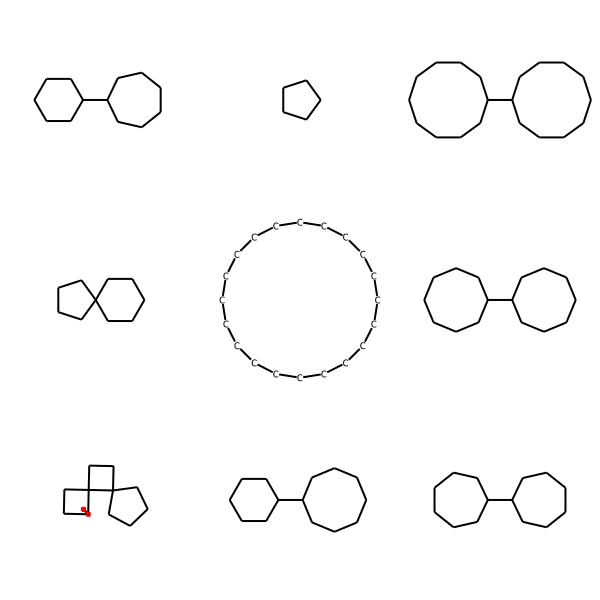

In [4]:
Draw.MolsToGridImage([most_freq, second_freq, third_freq, fourth_freq, fifth_freq, sixth_freq, seventh_freq, eighth_freq, nineth_freq])

In [106]:
from rdkit.Chem import rdFMCS
res = rdFMCS.FindMCS(covid_graph_scaffolds, ringMatchesRingOnly=True)

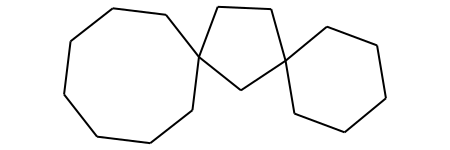

In [105]:
covid_graph_scaffolds[33]

In [107]:
res

In [108]:
res.smartsString

'[#6&R](-&@[#6&R]-&@[#6&R])-&@[#6&R]'

In [109]:
mcs = Chem.MolFromSmarts(res.smartsString)

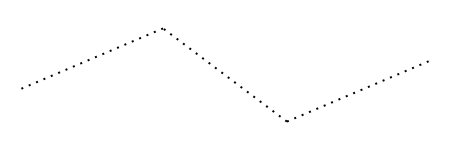

In [110]:
mcs

In [85]:
res.smartsString

'[#6](-[#6]-[#6])-[#6]-[#6]'

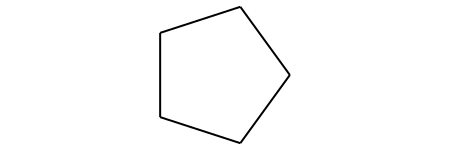

In [75]:
covid[1]

In [70]:
type(res)

rdkit.Chem.rdFMCS.MCSResult